<a href="https://colab.research.google.com/github/manishankarksaw15/Play-store-analysis/blob/main/TEAM_COLAB_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

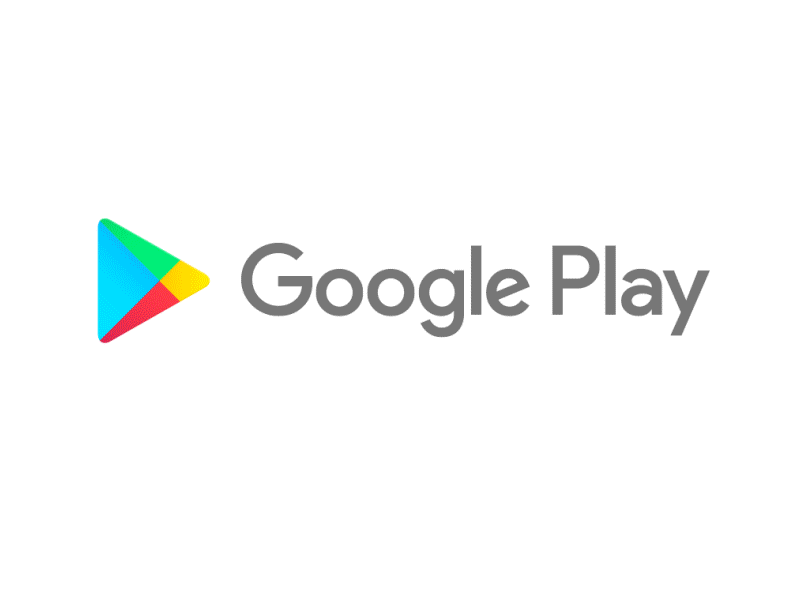

#**HELLO EVERYONE !**
In this notebook, I am going to analyze Google Play Store datas.Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

**playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.

**user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

#**PROBLEM STATEMENTS**

1). Which apps are the highest earners?

2). Top categories on Google Playstore?

3). Ratio between paid and free apps

4) Distribution of apps based on its size

5) Apps with the highest number of positive reviews

6) Apps with the highest number of negative reviews.

7) Is sentiment_subjectivity proportional to sentiment_polarity?

8) Does Last Update date has an effects on rating?

#**WHAT IS EXPLORATORY DATA ANALYSIS?**
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

The following are the various steps involved in the EDA process:


1.   **Problem Statement -** We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.

2.   **Hypothesis -** Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.

3.   **Univariate Analysis -** It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.

4.   **Bivariate Analysis -** This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
5.   **Multivariate Analysis -** This is done when more than two variables have to be analyzed simultaneously.
6.   **Data Cleaning -** We shall clean the dataset and handle the missing data, outliers and categorical variables. 
7.   **Testing Hypothesis -** We shall check if our data meets the assumptions required by most of the multivariate techniques.















In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone project /Play Store Data.csv'
Aa_ps_df=pd.read_csv(file_path)
review_path = '/content/drive/MyDrive/Colab Notebooks/Capstone project /User Reviews.csv'
Aa_ur_df=pd.read_csv(review_path)

In [ ]:
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Aa_ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
Aa_ps_df.shape

(10841, 13)

In [ ]:
Aa_ps_df.size

140933

In [ ]:
Aa_ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1.   **App -** It tells us about the name of the application with a short description (optional).
2.   **Category -** It gives the category to the app.
3.   **Rating -** It contains the average rating the respective app received from its users.
4.   **Reviews -** It tells us about the total number of users who have given a review for the application.
5.   **Size -** It tells us about the size being occupied the application on the mobile phone.
6.   **Installs -** It tells us about the total number of installs/downloads for an application.
7.   **Type -** IIt states whether an app is free to use or paid.
8.   **Price -** It gives the price payable to install the app. For free type apps, the price is zero.
9.   **Content Rating -** It states whether or not an app is suitable for all age groups or not.
10.  **Genres -** It tells us about the various other categories to which an application can belong.
11.  **Last Updated -** It tells us about the when the application was updated.
12.  **Current Ver -** It tells us about the current version of the application.
13. **Android Ver -** It tells us about the android version which can support the application on its platform.



#**CLEANING OF THE DATA**
The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

Removing the Nan value and Duplicate present in the data set

#**HANDLING THE NAN VALUES IN THE PLAYSTORE**

In [ ]:
def Appinfo():
  temp=pd.DataFrame(index=Aa_ps_df.columns)
  temp["datatype"]=Aa_ps_df.dtypes
  temp["not null values"]=Aa_ps_df.count()
  temp["null value"]=Aa_ps_df.isnull().sum()
  temp["% of the null value"]=Aa_ps_df.isnull().mean()
  temp["unique count"]=Aa_ps_df.nunique()
  return temp
Appinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.

#**1). ANDROID VER: There are a total of 3 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Android Ver column
Aa_ps_df[Aa_ps_df["Android Ver"].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Finding the different values the 'Android Ver' column takes
Aa_ps_df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
Aa_ps_df=Aa_ps_df[Aa_ps_df['Android Ver'].notna()]
# Shape of the updated dataframe
Aa_ps_df.shape

(10838, 13)

#**2). CURRENT VER: There are a total of 8 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Current Ver column
Aa_ps_df[Aa_ps_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
Aa_ps_df=Aa_ps_df[Aa_ps_df["Current Ver"].notna()]
# Shape of the updated dataframe
Aa_ps_df.shape

(10830, 13)

#**3). TYPE: There is only one NaN value in this column.**

In [ ]:
Aa_ps_df[Aa_ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the different values the 'Type' column takes
Aa_ps_df["Type"].value_counts()
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
Aa_ps_df.loc[9148,'Type']='Free'
Aa_ps_df[Aa_ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#**4). RATING: This column contains 1470 NaN values.**

In [ ]:
# The rows containing NaN values in the Rating column
Aa_ps_df[Aa_ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
Aa_ps_df[(Aa_ps_df['Rating'] <1) | (Aa_ps_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(Aa_ps_df[~Aa_ps_df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = Aa_ps_df[~Aa_ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1918, 4.3]

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
Aa_ps_df['Rating'].fillna(value=median_rating,inplace=True)

#**HANDLING DUPLICATES VALUES AND MANIPULATING:**
#**1).Handling the duplicates in theApp column**

In [ ]:
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Aa_ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [ ]:
Aa_ps_df[Aa_ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
Aa_ps_df[Aa_ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
# dropping duplicates from the 'App' column.
Aa_ps_df.drop_duplicates(subset = 'App', inplace = True)
Aa_ps_df.shape
Aa_ps_df[Aa_ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


#**2). Changing the datatype of the Last Updated column from string to datetime.**

In [ ]:
Aa_ps_df["Last Updated"] = pd.to_datetime(Aa_ps_df['Last Updated'])
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#**3). Changing the datatype of thePrice column from string to float.**

In [ ]:
Aa_ps_df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [ ]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [ ]:
# The drop_dollar funtion applied to the price column
Aa_ps_df['Price']=Aa_ps_df['Price'].apply(lambda x: dollar(x))
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
Aa_ps_df[Aa_ps_df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up



#**4). Converting the values in theInstallscolumn from string datatype to integer datatype.**

In [ ]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [ ]:
Aa_ps_df['Installs'] = Aa_ps_df['Installs'].apply(lambda x: plus(x))
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#**5). Converting the values in theSizecolumn to a same unit of measure(MB).**

In [ ]:
Aa_ps_df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [ ]:
def kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [ ]:
Aa_ps_df['Size'] = Aa_ps_df['Size'].apply(lambda x: kb_to_mb(x))
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
Aa_ps_df['Size'] = Aa_ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
Aa_ps_df['Size'] = Aa_ps_df['Size'].apply(lambda x: float(x))

In [ ]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = Aa_ps_df[Aa_ps_df['Size'] != 'Varies with device']['Size'].max()

min_size = Aa_ps_df[Aa_ps_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(Aa_ps_df[Aa_ps_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = Aa_ps_df[Aa_ps_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

#**6). Converting the datatype of values in theReviewscolumn from string to int.**

In [ ]:
Aa_ps_df['Reviews'] = Aa_ps_df['Reviews'].astype(int)
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#**DATA EXPLORATION--UNIVARIATE & BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

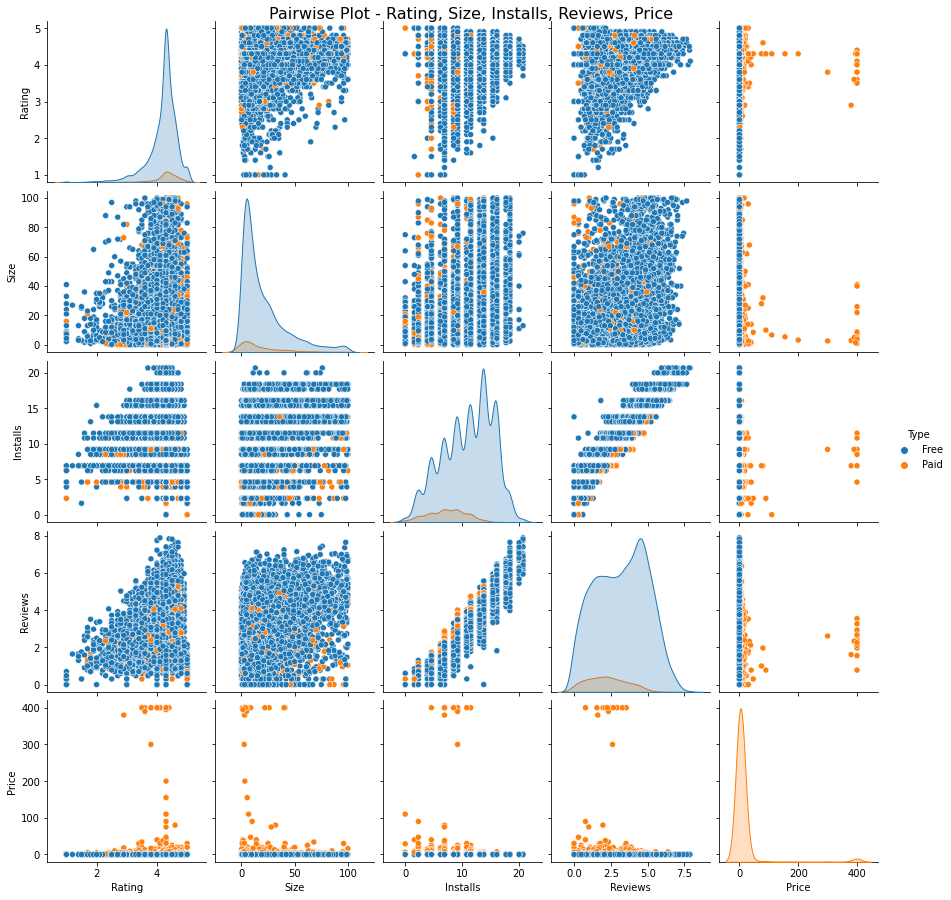

In [ ]:
Rating = Aa_ps_df['Rating']
Size = Aa_ps_df['Size']
Installs = Aa_ps_df['Installs']
Reviews = Aa_ps_df['Reviews']
Type = Aa_ps_df['Type']
Price = Aa_ps_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)


#**SIZE VS RATING**

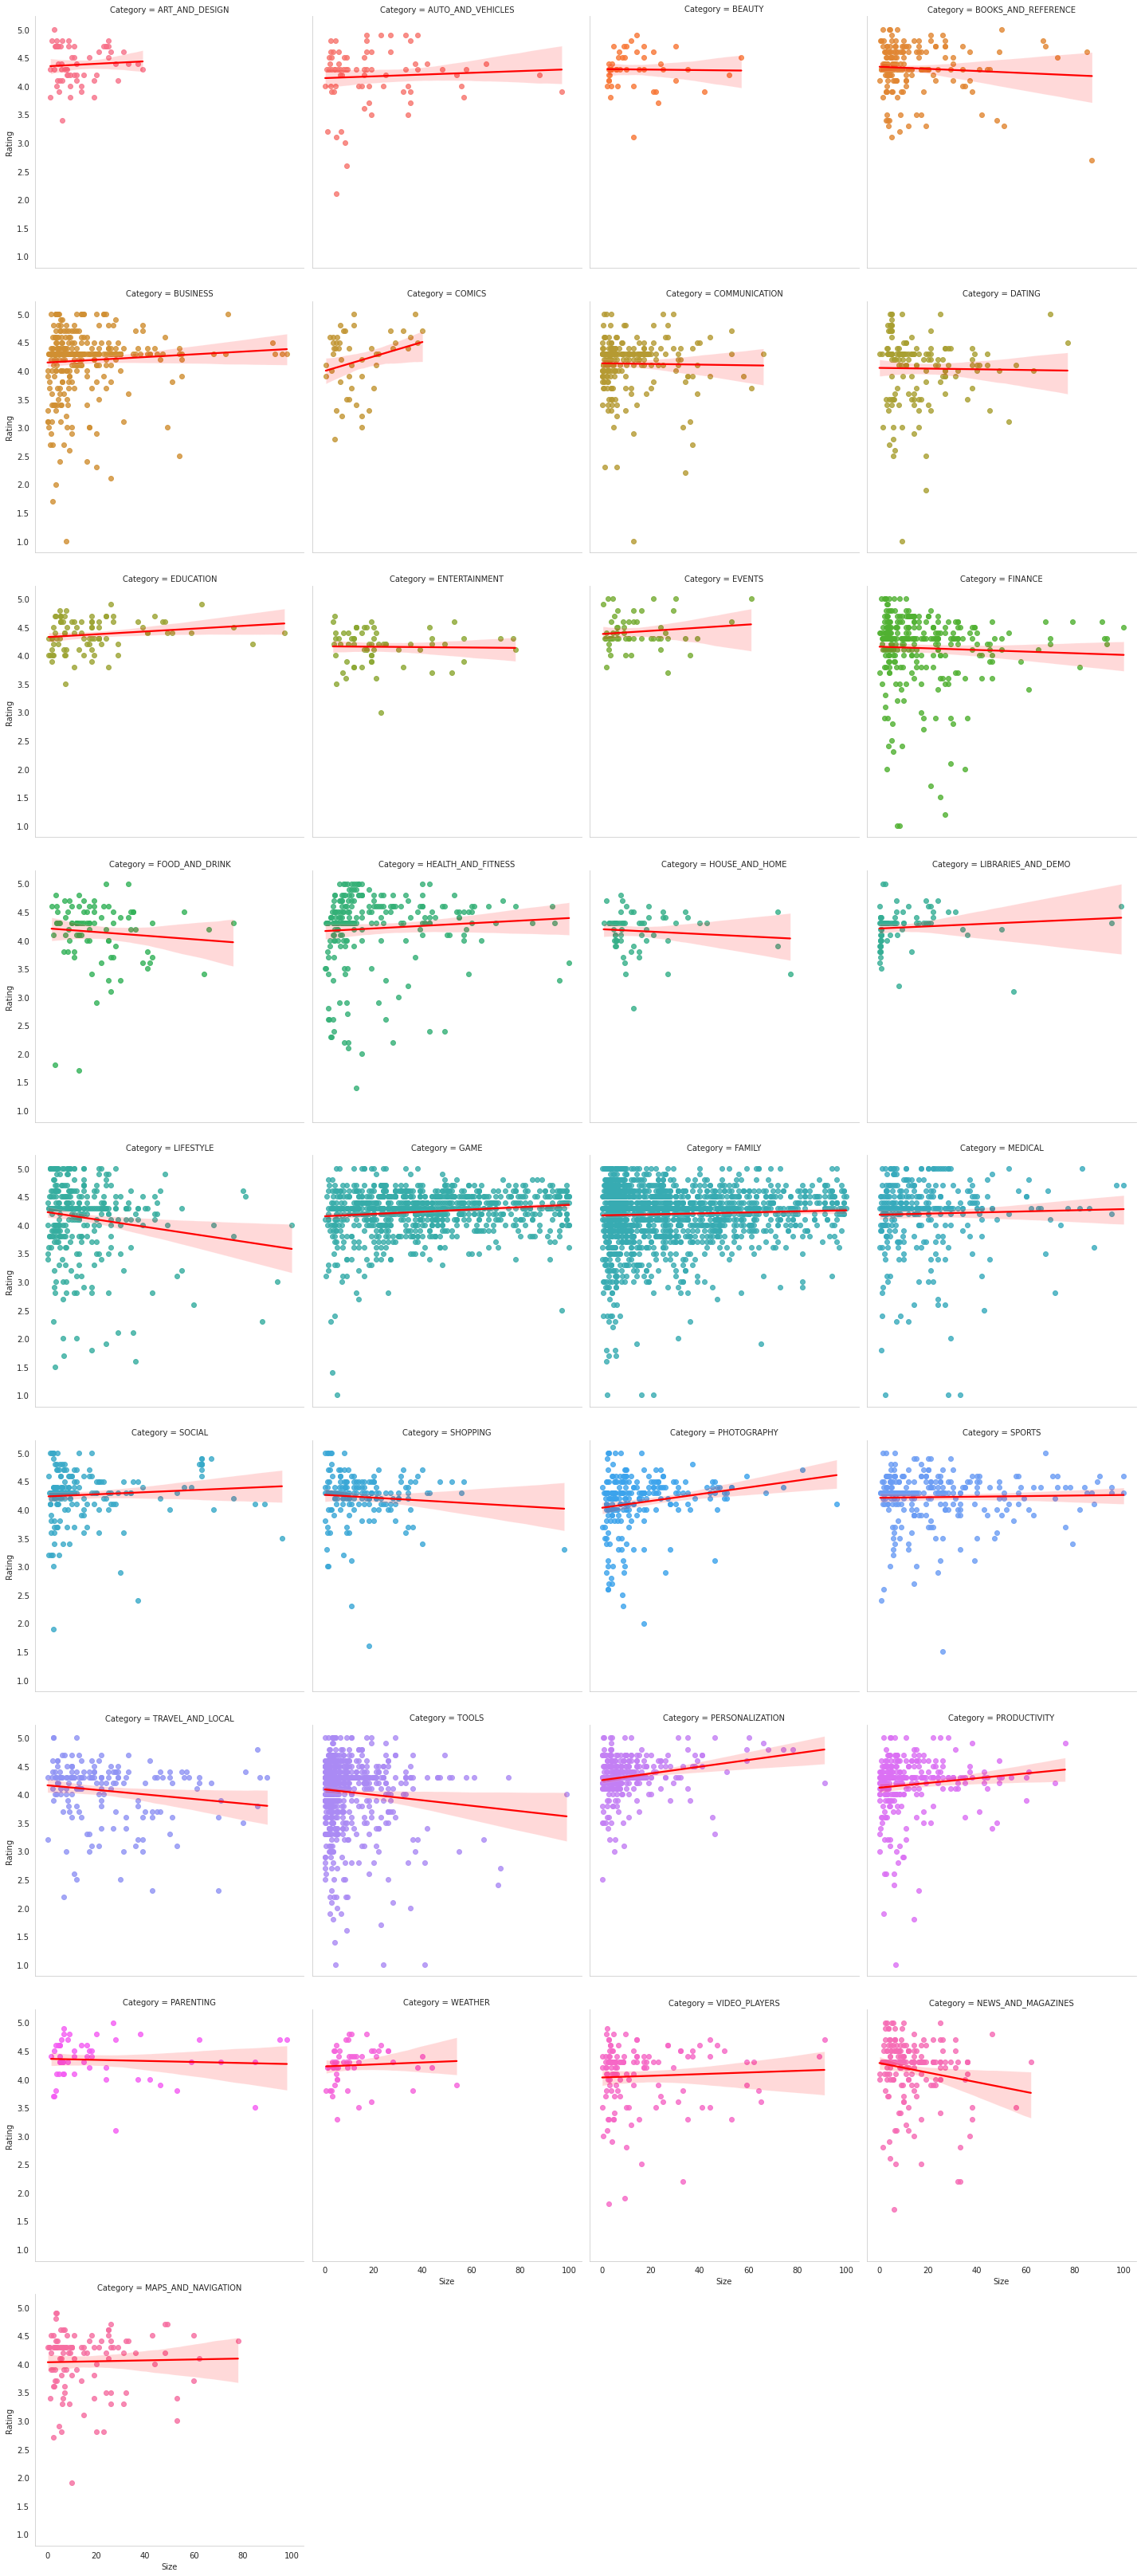

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=Aa_ps_df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'red'})

#**EXPLORING USER_REVIEW DATAFRAME**

In [ ]:
Aa_ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
Aa_ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
print(Aa_ur_df.columns)
rows=Aa_ur_df.shape[0]
columns=Aa_ur_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
the no of rows is 64295 and no of columns is 5


**Let us first define what information the columns contain based on our inspection.**

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

1.  **App:** Contains the name of the app with a short description (optional).
Translated_Review: It contains the English translation of the review dropped by the user of the app. 
2.   **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
3.   **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
4.   **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.








In [ ]:
def userinfo():
  temp1=pd.DataFrame(index=Aa_ur_df.columns)
  temp1["datatype"]=Aa_ur_df.dtypes
  temp1["not null values"]=Aa_ur_df.count()
  temp1["null value"]=Aa_ur_df.isnull().sum()
  temp1["% of the null value"]=Aa_ur_df.isnull().mean().round(4)*100
  temp1["unique count"]=Aa_ur_df.nunique()
  return temp1
userinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


#**HANDLING THE ERROR AND NAN VALUES IN THE USER REVIEWS**

In [ ]:
Aa_ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
Aa_ur_df[Aa_ur_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
Aa_ur_df[Aa_ur_df['Translated_Review'].isnull() & Aa_ur_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [ ]:
Aa_ur_df = Aa_ur_df.dropna()

In [ ]:
Aa_ur_df.shape

(37427, 5)

In [ ]:
Aa_ur_df.shape

(37427, 5)

#**DATA VISUALIZATION ON PLAY STORE DATA:**

#**1). Which apps are the highest earners?**

In [ ]:
#We are going to create a separate data frame in which we are simply doing the multiplication of |Price| and |Installs| columns to get the earnings of a particular app. Let's start 
paid_apps = Aa_ps_df[Aa_ps_df['Type'] == 'Paid']

In [ ]:
#Now separate the column from the above data frame
earning = paid_apps[['App', 'Installs', 'Price']]

In [ ]:
#Now we are doing multiplication of |Installs| and |Price| to add a separate column for earning

earning['Earnings'] = earning['Installs'] * earning['Price'];

In [ ]:
#Now sorting the above data by |Earnings| and |Price|

earning_sorted_by_Earnings = earning.sort_values(by='Earnings', ascending=False).head(20)

In [ ]:
earning_sorted_by_Price = earning_sorted_by_Earnings.sort_values(by='Price', ascending=False)

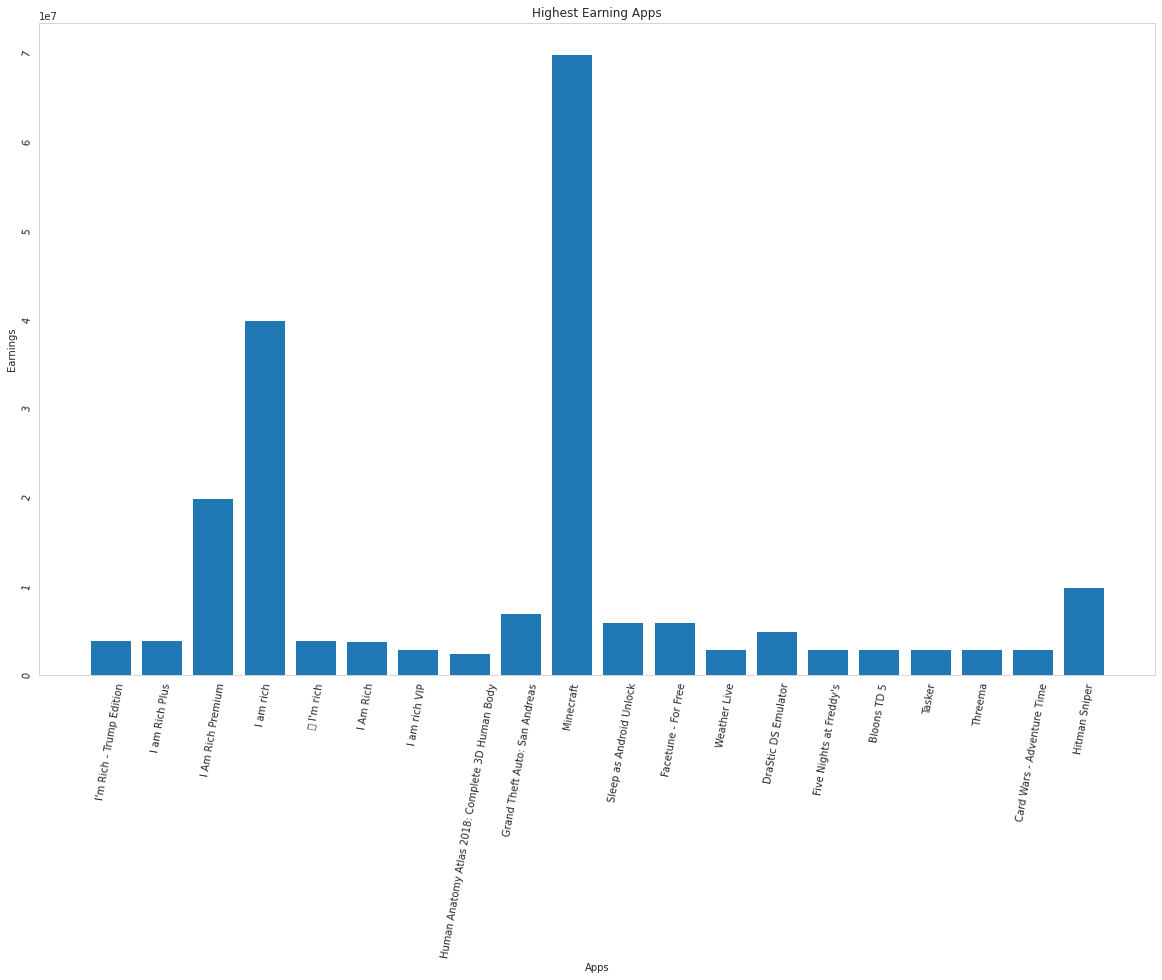

In [ ]:
#Now its time to plot the graph and lets see which apps made the highest earning 

#Here in the bar chart Y- Axis has earnings and X- Axis has the app name.
plt.figure(figsize=(20,12))
plt.bar(earning_sorted_by_Price.App, earning_sorted_by_Price.Earnings, width=0.8, label=earning_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=80)
plt.title("Highest Earning Apps");

#**2).Top categories on Google Playstore?**

In [ ]:
Aa_ps_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = Aa_ps_df['Category'].value_counts()
y = Aa_ps_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

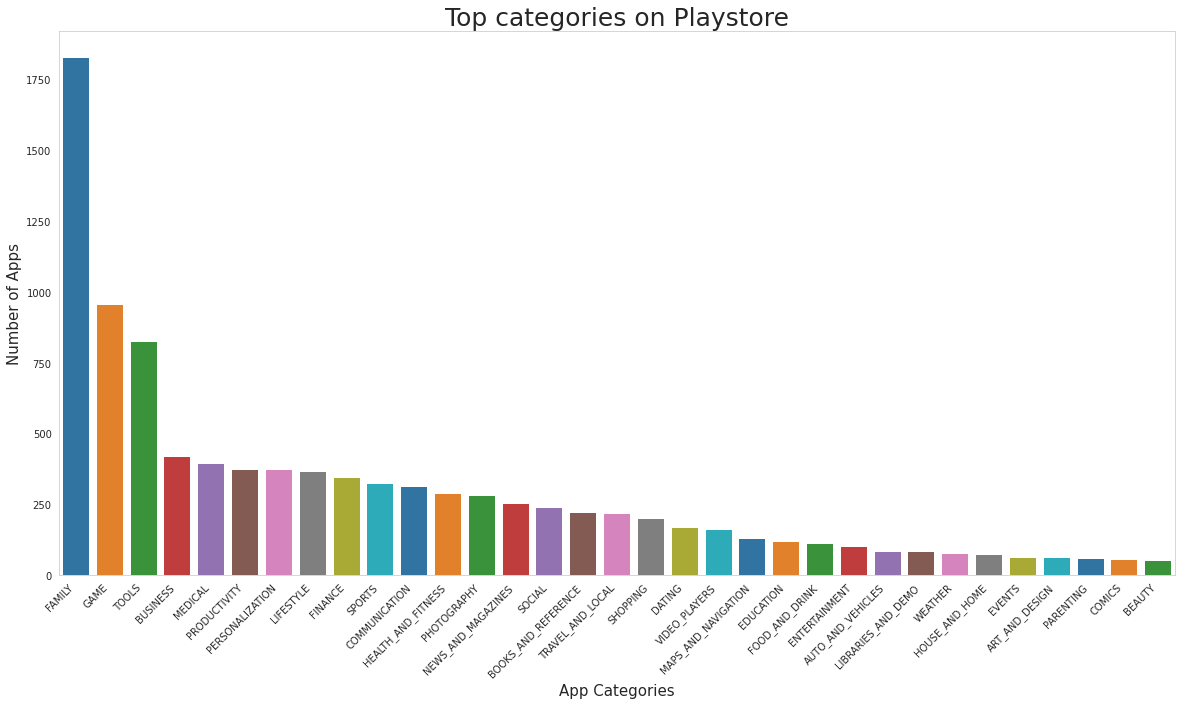

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('App Categories', size=15)
plt.ylabel('Number of Apps', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

**Findings:**

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category.

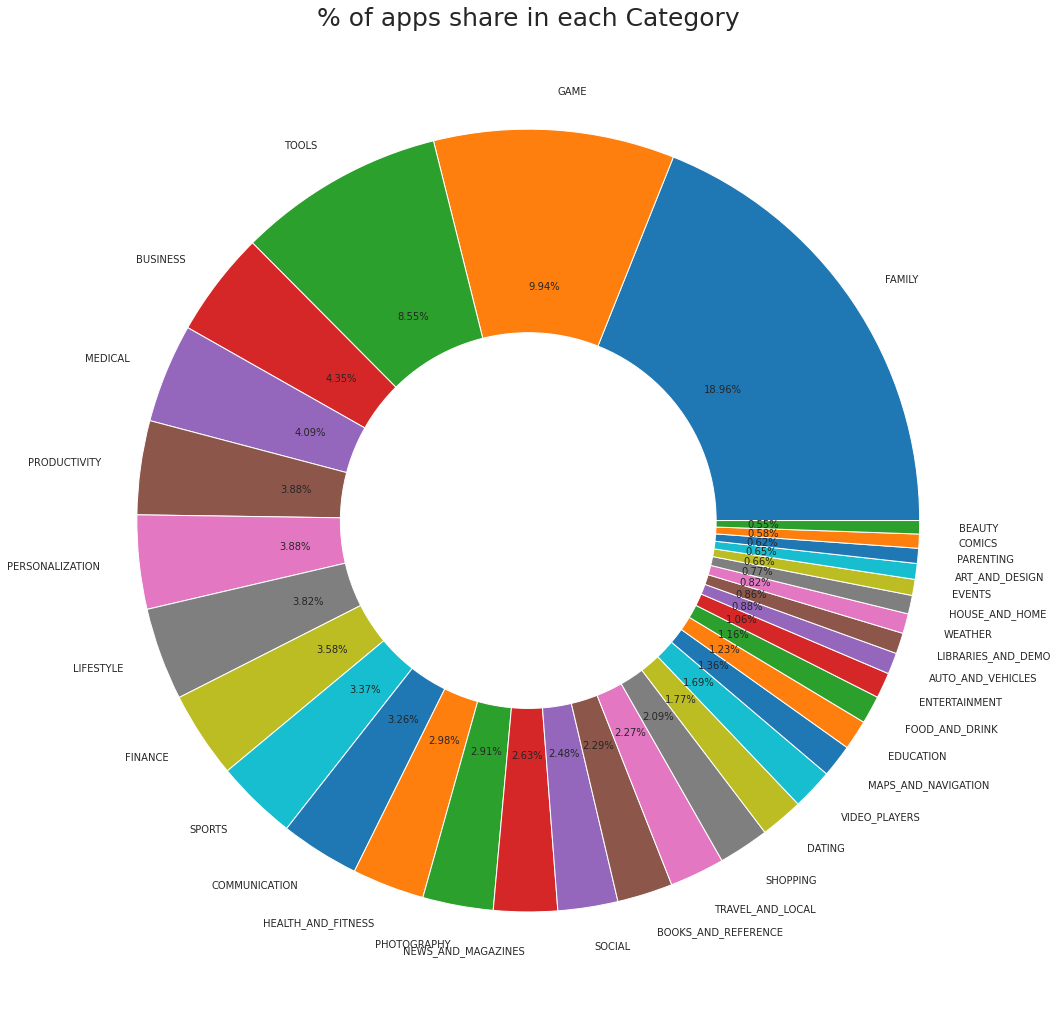

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(Aa_ps_df.Category.value_counts(), labels=Aa_ps_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.48, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

#**3).Ratio between paid and free apps**

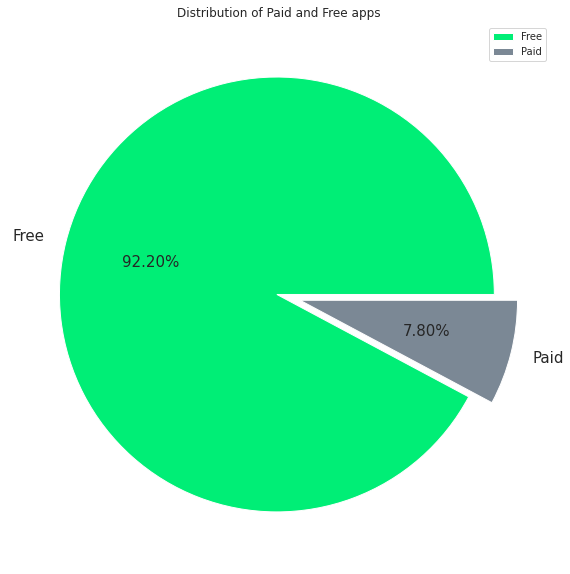

In [ ]:
data = Aa_ps_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=12,loc='center')
plt.legend()

**Findings:**

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

In [ ]:
Aa_ps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#**4) Distribution of apps based on its size**

In [ ]:
[mean_size,median_size,max_size,min_size]

[20.4136, 12.0, 100.0, 0.0083]

*   The size of an app in our database varies from 100 MB to 0.0083 MB. We can analyse the size of the apps if we can group them into certain intervals.
*   Lets group the data in the size column as follows into intervals of 10 each:

         (< 1 MB, 1-10, 10-20, 20-30, ..., 90-100, 'Varies with device')

In [ ]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

###**Lets apply the size_group function on the Size column and store the results in a new column named Size group.**

In [ ]:
Aa_ps_df['size_group']=Aa_ps_df['Size'].apply(lambda x : size_apps(x))
Aa_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1-10


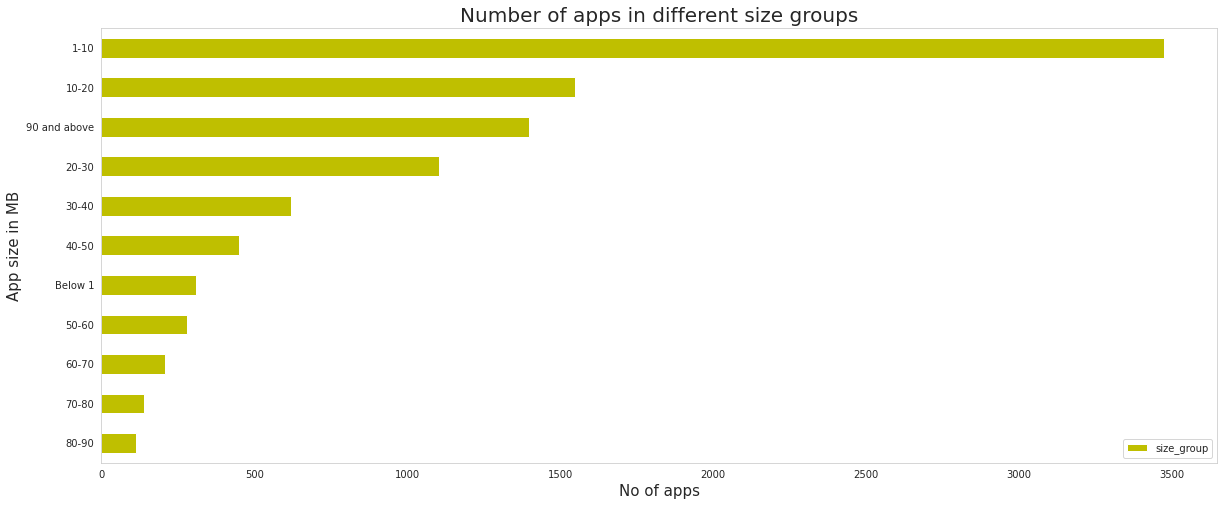

In [ ]:
# no of apps belonging to each size group
Aa_ps_df['size_group'].value_counts().plot.barh(figsize=(20,8),color='y').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

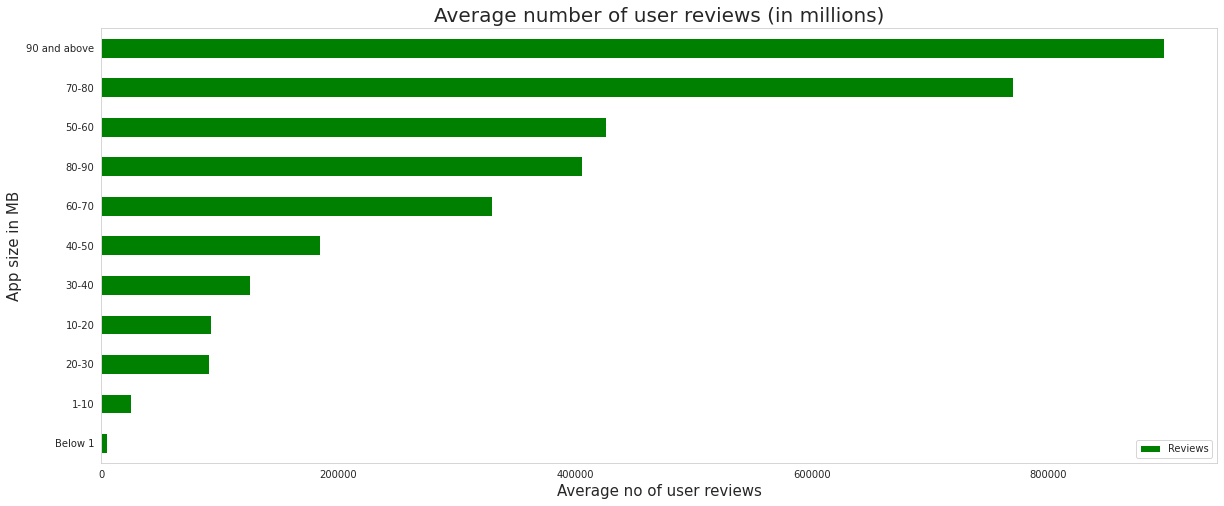

In [ ]:
# average no of user reviews in each size group
Aa_ps_df.groupby('size_group')['Reviews'].mean().sort_values().plot.barh(figsize=(20,8), color = 'green')
plt.title("Average number of user reviews (in millions)", size=20)
plt.xlabel('Average no of user reviews', size=15)
plt.ylabel('App size in MB', size=15)
plt.legend()

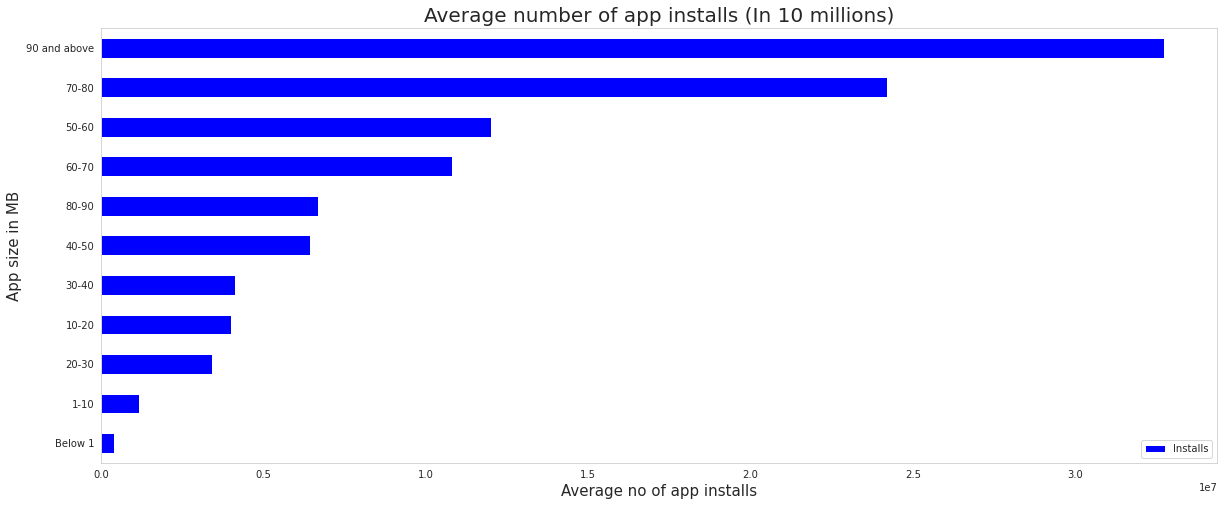

In [ ]:
# average number of app installs in each category

Aa_ps_df.groupby('size_group')['Installs'].mean().sort_values(ascending= False).plot.barh(figsize=(20,8),color='b').invert_yaxis()
plt.title("Average number of app installs (In 10 millions)", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('Average no of app installs',  size=15)
plt.legend()

The sizes of the majority of the apps range in between 1 and 20 MB.
The apps which are smaller in size on average have lower no of app installs and user reviews.

#**DATA VISUALIZATION ON USER REVIEWS:**

#***1) Apps with the highest number of positive reviews***

In [ ]:
positive_ur_df=Aa_ur_df[Aa_ur_df['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


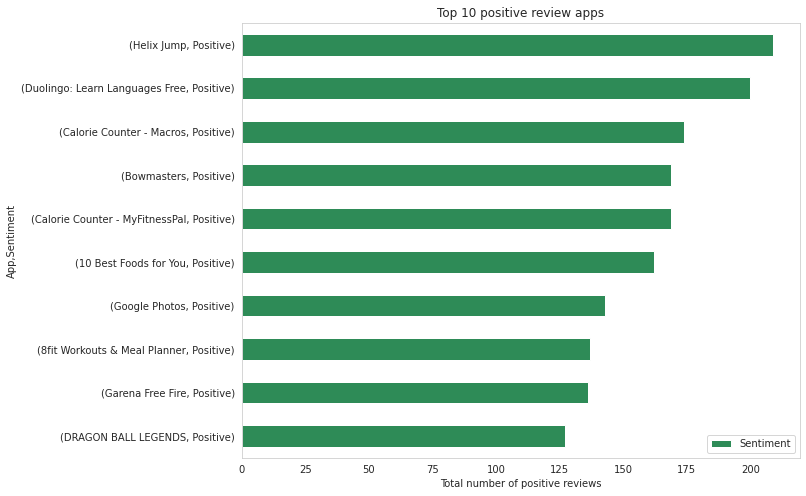

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

#***2) Apps with the highest number of negative reviews.***

In [ ]:
negative_ur_df=Aa_ur_df[Aa_ur_df['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


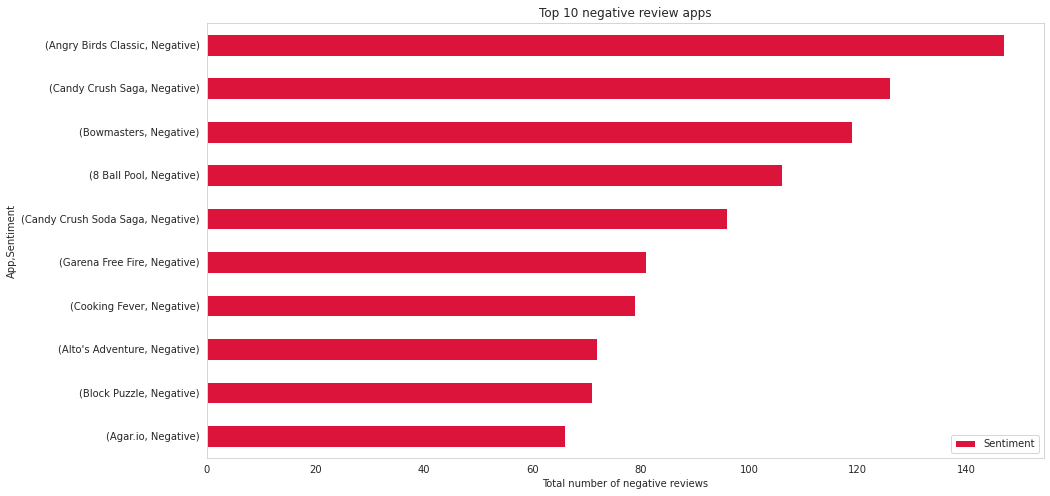

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

#***3) Is sentiment_subjectivity proportional to sentiment_polarity?***

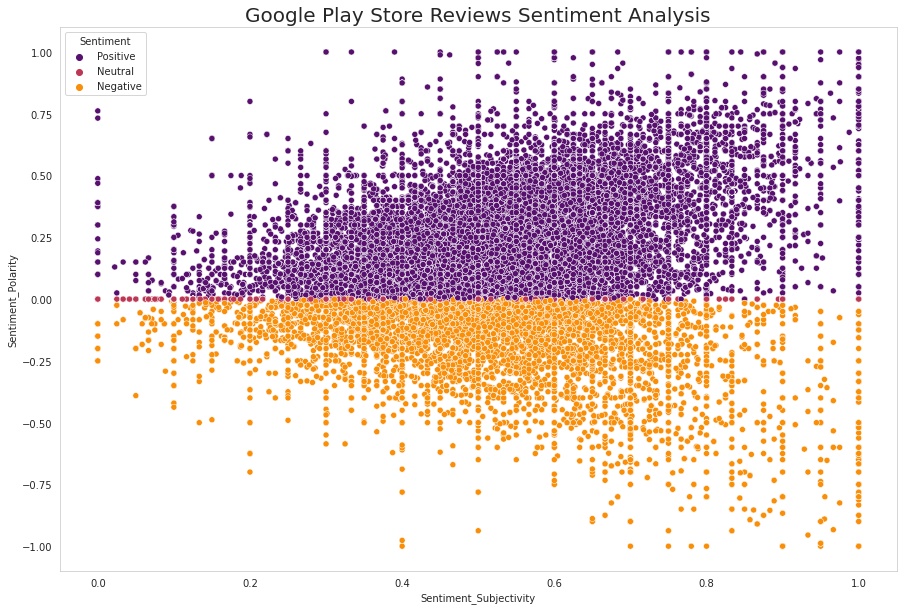

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(Aa_ur_df['Sentiment_Subjectivity'], Aa_ur_df['Sentiment_Polarity'],
                hue = Aa_ur_df['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

#**HOW CONTENT RATING AFFECT OVER THE APP**

#**DOES LAST UPDATE DATE HAS AN EFFECTS?**

In [ ]:
print(Aa_ps_df['Last Updated'].head())
#fetch update year from date
Aa_ps_df["Update year"] = Aa_ps_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


Text(0.5, 1.0, 'Update Year VS Rating')

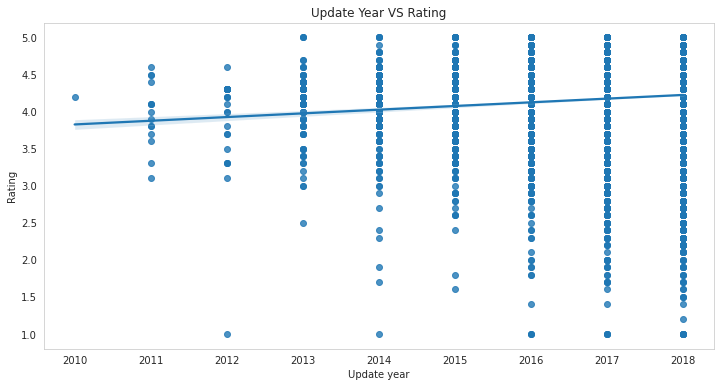

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=Aa_ps_df)
plt.title("Update Year VS Rating")

#**ANALYSIS SUMMARY** 

In this project of analyzing play store applications, we have worked on several parameters which would help AlmaBetter to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.


*   Developing apps related to the least categories as they are not explored much. Like events and beauty.
*   Most of the apps are Free, so focusing on free app is more important.
Focusing more on content available for Everyone will increase the chances of getting the highest installs.
*   They need to focus on updating their apps regularly, so that it will attract more users.
*   They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.








# **CONCLUSION**

* Reading the dataset and comprehending the problem statement. Our major challenge was data cleaning.

* Handling the error, duplicate and NaN values in the dataset.

* 13.60% of reviews were NaN values, and even after merging both the dataframes, we could not infer much in order to fill them. Thus we had to drop them. This is just 10% of the cleaned data, we could have given more valuable analysis, if we had atleast 70% - 80% of the data available in the merged dataframes.

* User Reviews had 42% of NaN values, which could have been used for developing an understanding of the category wise sentiments, which would help us to fill 13.60% NaN values of the Reviews column.

* There is so much more which can be explored. Like we have current version, android version available which can be explored in detail and we can come out with more analysis where we can tell how does these things effect and needs to be kept in mind while developing app for the users.

* Designing multiple visualizations to summarize the information in the dataset and successfully communicate the results and trends to the reader.